In [6]:
# This is a notebook to perform spectral decomposition of a 1D spectrum extracted from JWST MIRI/MRS cubes.
# The spectrum can be obtained with CRETA, or be provided by the user as an ascii table with colums including wavelenght, flux, and flux error.

In [ ]:
import os
os._exit(00)

In [1]:
import sys
sys.path.insert(0, '../')

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib widget
import matplotlib.ticker
from matplotlib.backends.backend_pdf import PdfPages

import cafe_io
from cafe_io import *
import cafe_helper
import cafe

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Setup data directory and parameter files.
source_fd = '../../CRETA/extractions/'
source_fn = 'IIZw096_SingleExt_r0.3as_cube.fits'
source_fnb = source_fn.split('.fits')[0].replace('.','')

cafe_dir = '../'
inppar_fn = cafe_dir+'inp_parfiles/inpars_jwst_miri_IIZw096.ini'
optpar_fn = cafe_dir+'opt_parfiles/default_opt.cafe'

z=0.03637
s = cafe.specmod(cafe_dir)

In [3]:
s.read_spec(source_fn, file_dir=source_fd, z=z)

Filename: ../../CRETA/extractions/IIZw096_SingleExt_r0.3as_cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FLUX          1 ImageHDU        36   (11532,)   float64   
  2  ERR           1 ImageHDU         7   (11532,)   float64   
  3  FLUX_ST       1 ImageHDU         7   (11532,)   float64   
  4  ERR_ST        1 ImageHDU         7   (11532,)   float64   
  5  DQ            1 ImageHDU         7   (11532,)   float64   
  6  WAVE          1 ImageHDU         7   (11532,)   float64   
  7  BAND_NAME     1 BinTableHDU     11   11532R x 1C   [20A]   


Generating continuum profiles for guess model
Parameter object has 33 lines, 25 PAHs, 2 opacity features, and 42 continuum parameters
ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
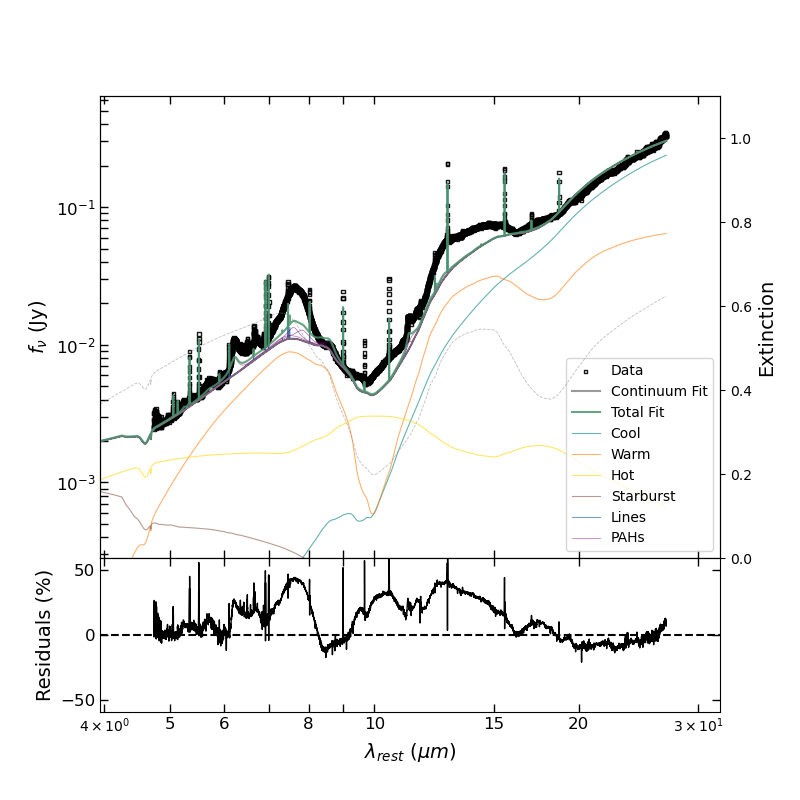

In [4]:
s.plot_spec_ini(inppar_fn, optpar_fn)

In [5]:
s.fit_spec(inppar_fn, optpar_fn)

Generating parameter cube with initial/full parameter object
Parameter object has 47 lines, 25 PAHs, 2 opacity features, and 42 continuum parameters
Generating parameter object
Parameter object has 33 lines, 25 PAHs, 2 opacity features, and 42 continuum parameters
Generating continuum profiles
ISRF
ISRF
2.35 seconds to make continnum profiles
Fitting 220 parameters
Iteration 1/5(max): 2023-01-11 21:51:06.140851 -----------------
True in 27 steps
46.22 seconds elapsed
<Parameter 'STB_010', value=0.9999910624055013 +/- 1.34e+05, bounds=[0.0:1.0]> at upper bound, fixing to  1.0
<Parameter 'g_FeII_50624N_Peak', value=1.0849339828466662e-16 +/- 0.00187, bounds=[0.0:inf]> at lower bound, fixing to 0.0
<Parameter 'g_Humphreys96_59066N_Peak', value=5.3501991477286395e-14 +/- 0.0054, bounds=[0.0:inf]> at lower bound, fixing to 0.0
<Parameter 'g_Pfund65_74578B_Gamma', value=0.0066711139892705025 +/- 0.00112, bounds=[0.00026406733481945227:0.0066711140760507]> at upper bound, fixing to 0.00667111

In [6]:
# Line and PAH averaged velocity gradient wrt z, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])
print(s.parcube['VALUE'].data[-1,0,0]/2.998e5)

-0.15237686054912303
-5.082617096368346e-07


ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


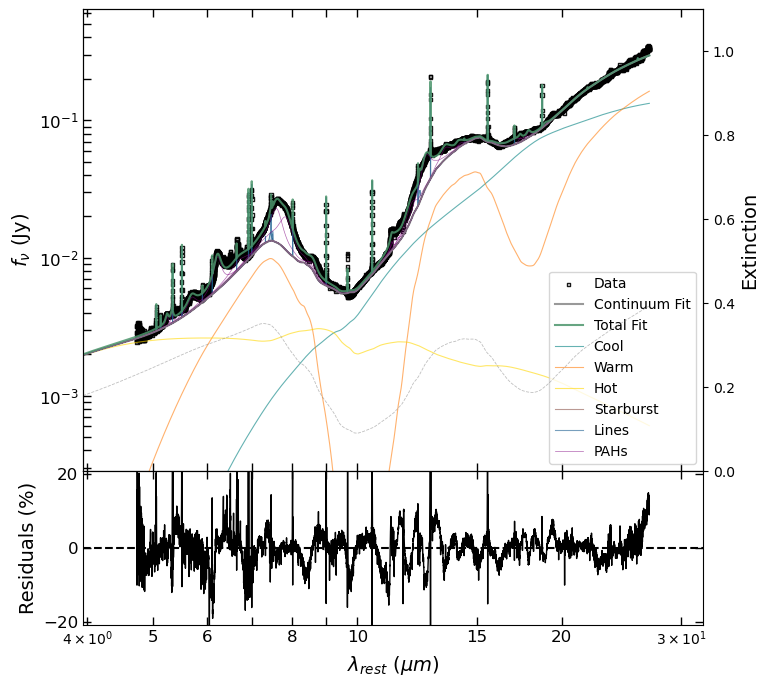

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
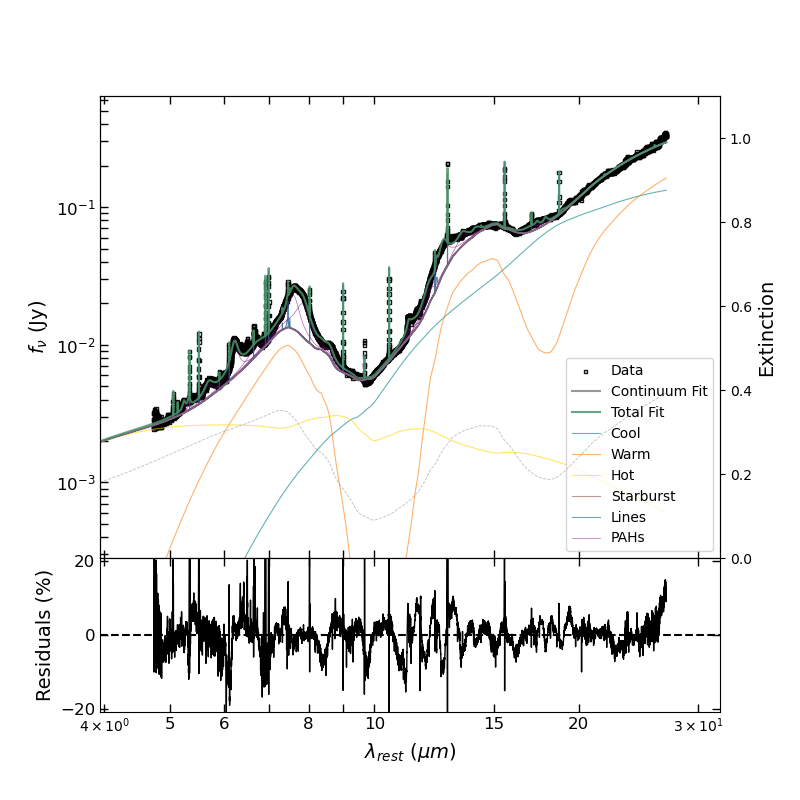

In [7]:
s.plot_spec_fit(inppar_fn, optpar_fn)

In [3]:
########### Starting a session from scratch ###############

parcube_fd = '../output/'+source_fnb+'/'
parcube_fn = source_fnb+'_parcube.fits'

In [4]:
# Load the the spectrum
s.read_spec(source_fn, file_dir=source_fd, z=z)

Filename: ../../CRETA/extractions/IIZw096_SingleExt_r0.3as_cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  FLUX          1 ImageHDU        36   (11532,)   float64   
  2  ERR           1 ImageHDU         7   (11532,)   float64   
  3  FLUX_ST       1 ImageHDU         7   (11532,)   float64   
  4  ERR_ST        1 ImageHDU         7   (11532,)   float64   
  5  DQ            1 ImageHDU         7   (11532,)   float64   
  6  WAVE          1 ImageHDU         7   (11532,)   float64   
  7  BAND_NAME     1 BinTableHDU     11   11532R x 1C   [20A]   


In [5]:
# Load the parameter cube from disk
s.read_parcube_file(parcube_fn, file_dir=parcube_fd)

Filename: ../output/IIZw096_SingleExt_r03as_cube/IIZw096_SingleExt_r03as_cube_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU        38   (1, 1, 262)   float64   
  2  STDERR        1 ImageHDU        38   (1, 1, 262)   float64   
  3  VARY          1 ImageHDU        38   (1, 1, 262)   float64   
  4  MIN           1 ImageHDU        38   (1, 1, 262)   float64   
  5  MAX           1 ImageHDU        38   (1, 1, 262)   float64   
  6  EXPR          1 BinTableHDU     13   262R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   262R x 2C   [I, 32A]   


ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


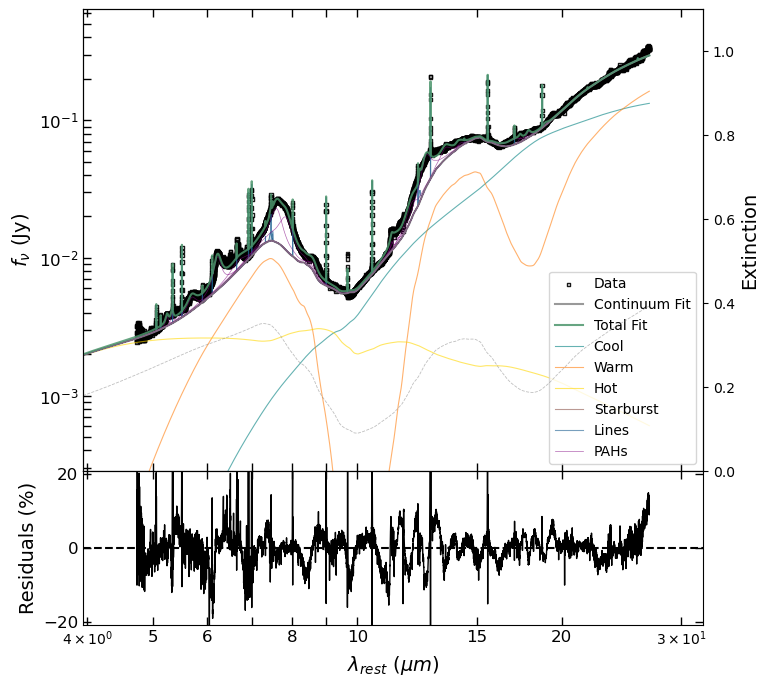

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
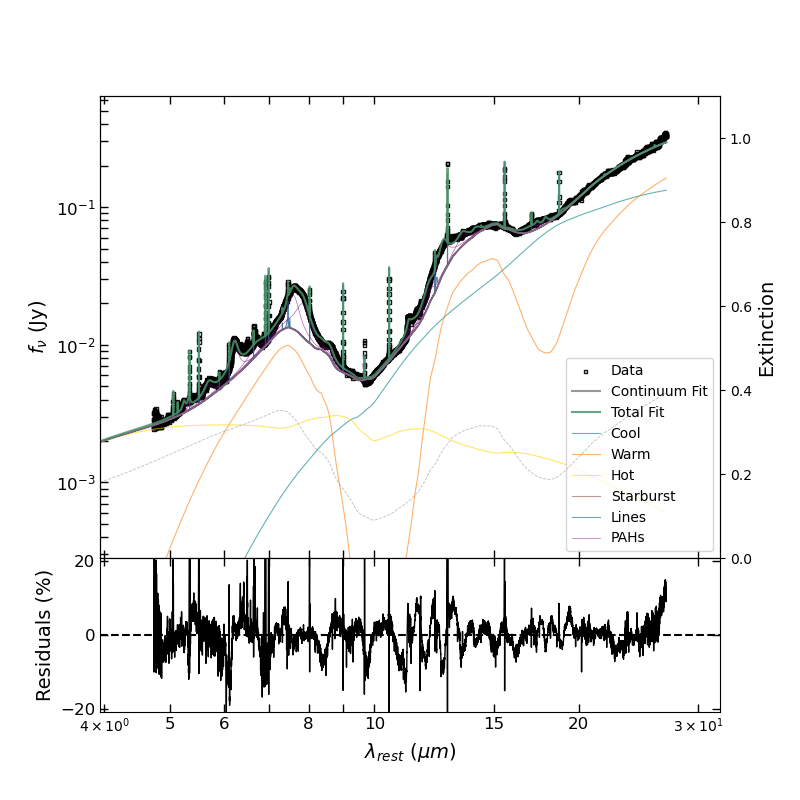

In [11]:
# Plot the previous fit
s.plot_spec_fit(inppar_fn, optpar_fn)

In [12]:
# We may want to fit again the spectrum but using the result from the fit of another spectrum
# (or from a previous fit from the same spectrum, although this is not recommended as most parameters have been already optimized and that gives trouble to LMFIT)
# For this example case, nevertheless, we use the previous fit from the same spectrum

In [13]:
# Note this is technically unnecessary if the initalization is done with the same spectrum, since the parameter cube is already loaded in s.parcube
ini = cafe.specmod(cafe_dir)
ini.read_parcube_file(parcube_fn, file_dir=parcube_fd)

Filename: ../output/IIZw096_SingleExt_r03as_cube/IIZw096_SingleExt_r03as_cube_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU        38   (1, 1, 262)   float64   
  2  STDERR        1 ImageHDU        38   (1, 1, 262)   float64   
  3  VARY          1 ImageHDU        38   (1, 1, 262)   float64   
  4  MIN           1 ImageHDU        38   (1, 1, 262)   float64   
  5  MAX           1 ImageHDU        38   (1, 1, 262)   float64   
  6  EXPR          1 BinTableHDU     13   262R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   262R x 2C   [I, 32A]   


Generating continuum profiles for guess model
Parameter object has 33 lines, 25 PAHs, 2 opacity features, and 42 continuum parameters
The initial parameters will be set to the values from the parameter cube provided
Parameter object has 33 lines, 25 PAHs, 2 opacity features, and 42 continuum parameters
ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
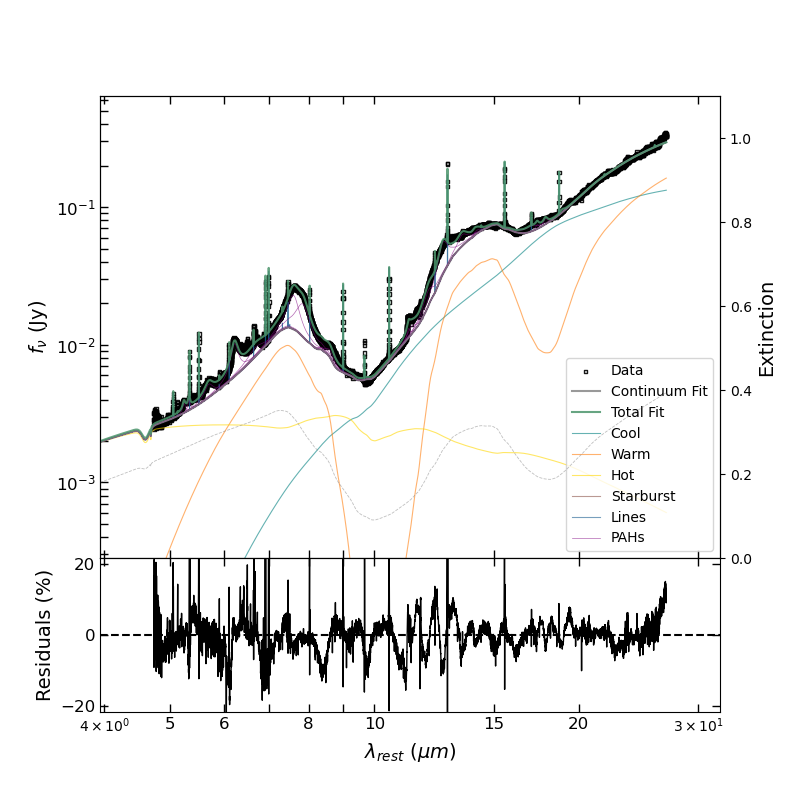

In [14]:
# See the initialized spectrum (should be the same as the fitted spectrum above)
s.plot_spec_ini(inppar_fn, optpar_fn, ini_parcube=ini.parcube)

In [15]:
# Refit using the last fit results as initialization
s.fit_spec(inppar_fn, optpar_fn, ini_parcube=ini.parcube)

Generating parameter cube with initial/full parameter object
Parameter object has 47 lines, 25 PAHs, 2 opacity features, and 42 continuum parameters
Generating parameter object
Parameter object has 33 lines, 25 PAHs, 2 opacity features, and 42 continuum parameters
The params will be set to the parameters of the parcube provided for initialization
Parameter object has 33 lines, 25 PAHs, 2 opacity features, and 42 continuum parameters
Generating continuum profiles
ISRF
ISRF
2.34 seconds to make continnum profiles
Fitting 220 parameters
Iteration 1/5(max): 2023-01-11 21:53:03.761254 -----------------
True in 7 steps
12.61 seconds elapsed
No errors retuned
<Parameter 'STB_FLX', value=6.948853286883782e-07, bounds=[0.0:2.0]> at lower bound, fixing to 0.0
<Parameter 'STB_COV', value=5.967633978967604e-07, bounds=[0.0:1.0]> at lower bound, fixing to 0.0
<Parameter 'g_FeII_50624N_Peak', value=4.494654476571301e-08, bounds=[0.0:inf]> at lower bound, fixing to 0.0
<Parameter 'd8_PAH107_106800_Pe

/Users/tanio/Sync/pywork/CAFE/CAFE/notebooks/../cafe.py:530: ResourceWarning: unclosed file <_io.BufferedReader name='../output/IIZw096_SingleExt_r03as_cube/IIZw096_SingleExt_r03as_cube_parcube.fits'>
  self.parcube = parcube


In [16]:
# Line and PAH averaged velocity gradient wrt z, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])
print(s.parcube['VALUE'].data[-1,0,0]/2.998e5)

0.0017475919025311988
5.829192470084052e-09


ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


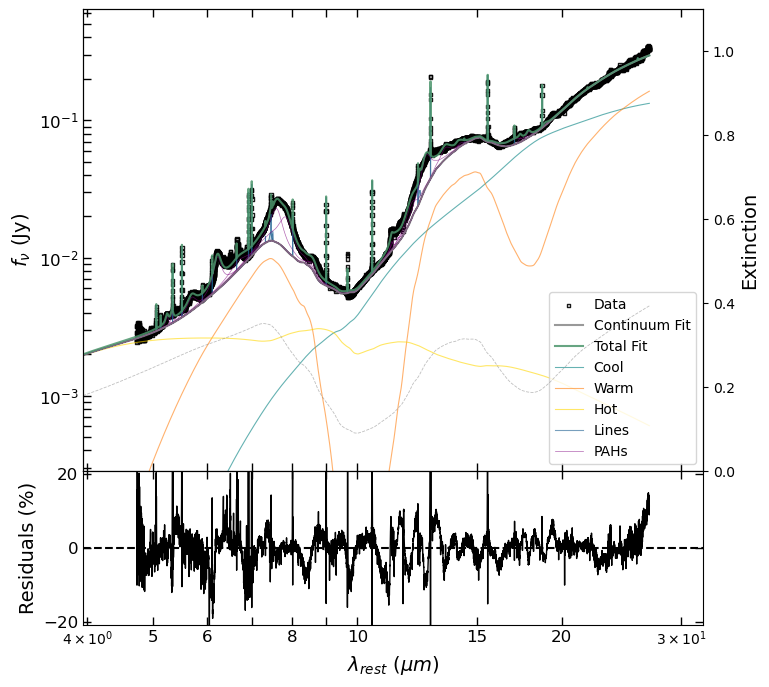

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
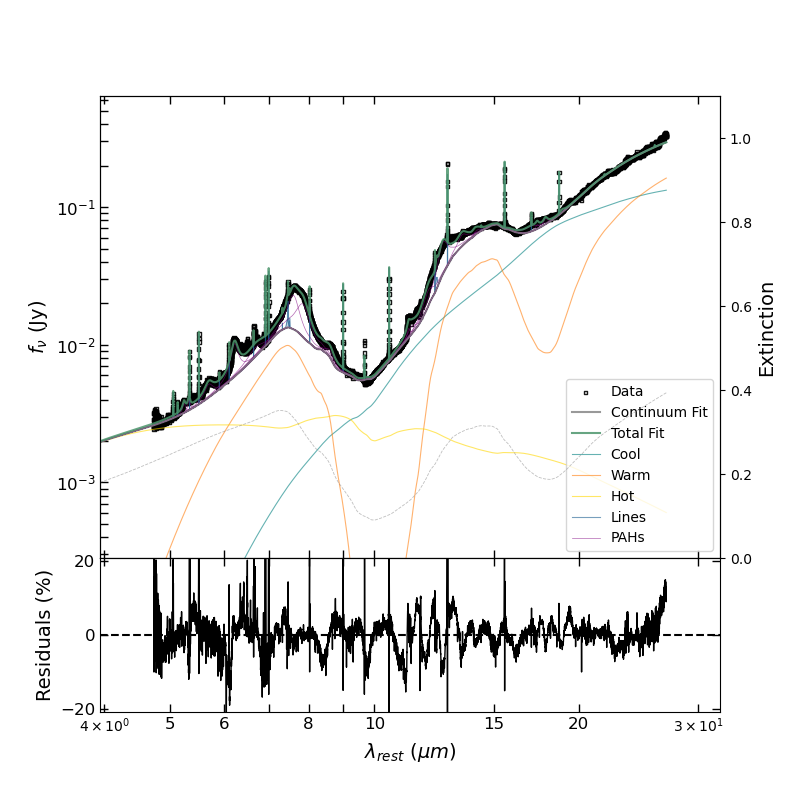

In [17]:
s.plot_spec_fit(inppar_fn, optpar_fn)

In [23]:
# We can iterate ad infinitum but the fit probably has converged
ini2 = cafe.specmod(cafe_dir)
ini2.read_parcube_file(parcube_fn, file_dir=parcube_fd)

/var/folders/0g/_n9dngxj17746hmn6rwwf4580000gn/T/ipykernel_44799/2011929703.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='../output/IIZw096_SingleExt_r03as_cube/IIZw096_SingleExt_r03as_cube_parcube.fits'>
  ini2 = cafe.specmod(cafe_dir)


Filename: ../output/IIZw096_SingleExt_r03as_cube/IIZw096_SingleExt_r03as_cube_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU        38   (1, 1, 262)   float64   
  2  STDERR        1 ImageHDU        38   (1, 1, 262)   float64   
  3  VARY          1 ImageHDU        38   (1, 1, 262)   float64   
  4  MIN           1 ImageHDU        38   (1, 1, 262)   float64   
  5  MAX           1 ImageHDU        38   (1, 1, 262)   float64   
  6  EXPR          1 BinTableHDU     13   262R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   262R x 2C   [I, 32A]   


In [24]:
s.fit_spec(inppar_fn, optpar_fn, ini_parcube=ini2.parcube)

Generating parameter cube with initial/full parameter object
Parameter object has 47 lines, 25 PAHs, 2 opacity features, and 42 continuum parameters
Generating parameter object
Parameter object has 33 lines, 25 PAHs, 2 opacity features, and 42 continuum parameters
The params will be set to the parameters of the parcube provided for initialization
Parameter object has 33 lines, 25 PAHs, 2 opacity features, and 42 continuum parameters
Generating continuum profiles
ISRF
ISRF
2.41 seconds to make continnum profiles
Fitting 220 parameters
Iteration 1/5(max): 2023-01-11 22:10:34.499843 -----------------
True in 2 steps
3.97 seconds elapsed
No errors retuned
<Parameter 'COO_TMP', value=51.39969209007309, bounds=[0.0:inf]> at initial value 51.39966194122434 . Fixing value.
<Parameter 'HOT_TMP', value=457.0186742809759, bounds=[100.0:1027.2]> at initial value 457.0184830551098 . Fixing value.
<Parameter 'STB_TAU', value=3440159.6703873905, bounds=[0.0:inf]> at initial value 3440159.6703873905 .

KeyboardInterrupt: 

In [20]:
# Line and PAH averaged velocity gradient wrt z, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])
print(s.parcube['VALUE'].data[-1,0,0]/2.998e5)

-0.012092555262083951
-4.033540781215461e-08


ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


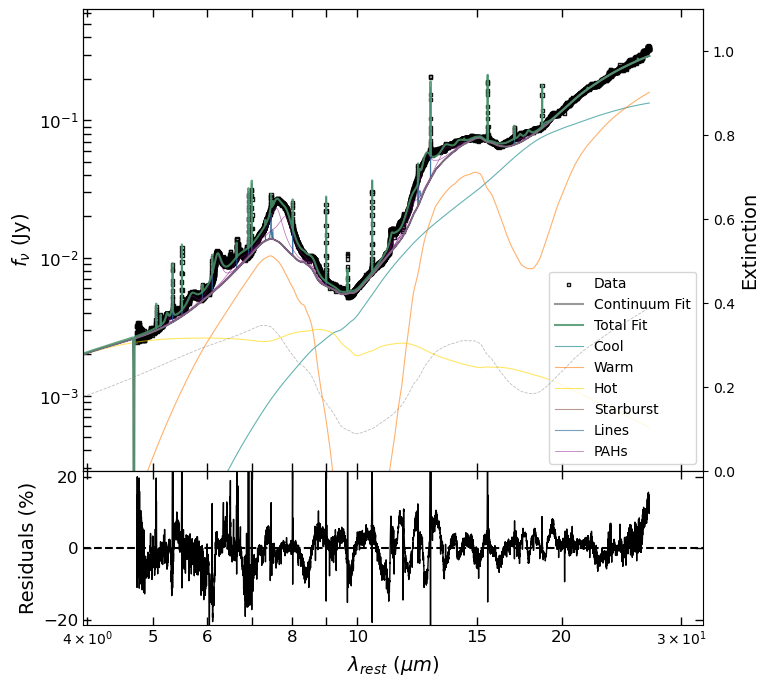

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
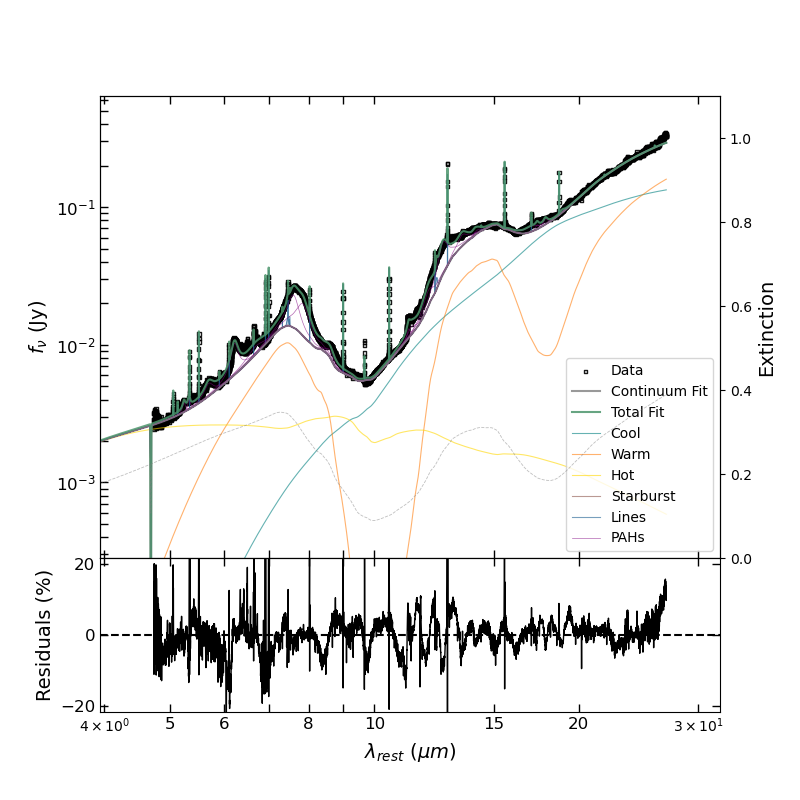

In [21]:
s.plot_spec_fit(inppar_fn, optpar_fn)

In [6]:
s.save_asdf(inppar_fn, optpar_fn, file_name=parcube_fn.split('.fits')[0])

ISRF
ISRF


/usr/local/anaconda3/lib/python3.8/site-packages/asdf/entry_points.py:44: AsdfWarning: asdf_extensions plugin from package gwcs==0.16.1 failed to load:

ContextualVersionConflict: (jsonschema 4.16.0 (/usr/local/anaconda3/lib/python3.8/site-packages), Requirement.parse('jsonschema<4,>=3.0.2'), {'asdf'})
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/asdf/entry_points.py:44: AsdfWarning: asdf_extensions plugin from package jwst==1.3.3 failed to load:

ContextualVersionConflict: (jsonschema 4.16.0 (/usr/local/anaconda3/lib/python3.8/site-packages), Requirement.parse('jsonschema<4,>=3.0.2'), {'asdf'})
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/asdf/entry_points.py:44: AsdfWarning: asdf_extensions plugin from package specutils==1.4.1 failed to load:

ContextualVersionConflict: (jsonschema 4.16.0 (/usr/local/anaconda3/lib/python3.8/site-packages), Requirement.parse('jsonschema<4,>=3.0.2'), {'asdf'})
  warnings.warn(
/usr/local/anaconda3/lib/python3.8

RepresenterError: ('cannot represent an object', {'cafefit': {'obsspec': {'wave': array([ 4.7284272 ,  4.72919912,  4.72997105, ..., 26.9102739 ,
       26.91606334, 26.92185278]), 'flux': array([0.00317711, 0.00286001, 0.00253317, ..., 0.32507795, 0.32951977,
       0.33385175]), 'flux_unc': array([8.35200091e-06, 7.48609702e-06, 7.77154683e-06, ...,
       1.05428725e-03, 1.16315598e-03, 2.14845187e-03])}, 'fitPars': {'CIR_FLX': <Parameter 'CIR_FLX', value=0.0 (fixed), bounds=[0.0:2.0]>, 'CIR_TMP': <Parameter 'CIR_TMP', value=3.74 (fixed), bounds=[0.0:inf]>, 'CLD_FLX': <Parameter 'CLD_FLX', value=0.0 (fixed), bounds=[0.0:2.0]>, 'CLD_TMP': <Parameter 'CLD_TMP', value=6.89 (fixed), bounds=[0.0:inf]>, 'COO_FLX': <Parameter 'COO_FLX', value=0.5245665752808586, bounds=[0.0:2.0]>, 'COO_TMP': <Parameter 'COO_TMP', value=51.39966194122434 (fixed), bounds=[0.0:inf]>, 'COO_TAU': <Parameter 'COO_TAU', value=0.7331150779047062, bounds=[0.0:inf]>, 'COO_MIX': <Parameter 'COO_MIX', value=0.0 (fixed), bounds=[0.0:1.0]>, 'COO_COV': <Parameter 'COO_COV', value=1.0 (fixed), bounds=[0.0:1.0]>, 'WRM_FLX': <Parameter 'WRM_FLX', value=0.5115903070133083, bounds=[0.0:2.0]>, 'WRM_TMP': <Parameter 'WRM_TMP', value=79.27808185642927, bounds=[0.0:inf]>, 'WRM_TAU': <Parameter 'WRM_TAU', value=11.222983430742415, bounds=[0.0:inf]>, 'WRM_MIX': <Parameter 'WRM_MIX', value=0.0 (fixed), bounds=[0.0:1.0]>, 'WRM_COV': <Parameter 'WRM_COV', value=1.0 (fixed), bounds=[0.0:1.0]>, 'HOT_FLX': <Parameter 'HOT_FLX', value=0.49222485429650853, bounds=[0.0:2.0]>, 'HOT_TMP': <Parameter 'HOT_TMP', value=457.0184830551098, bounds=[100.0:1027.2]>, 'HOT_TAU': <Parameter 'HOT_TAU', value=2.1342238044553463, bounds=[0.0:inf]>, 'HOT_MIX': <Parameter 'HOT_MIX', value=0.0 (fixed), bounds=[0.0:1.0]>, 'HOT_COV': <Parameter 'HOT_COV', value=1.0 (fixed), bounds=[0.0:1.0]>, 'STR_FLX': <Parameter 'STR_FLX', value=0.0 (fixed), bounds=[0.0:2.0]>, 'STR_TAU': <Parameter 'STR_TAU', value=0.0 (fixed), bounds=[0.0:inf]>, 'STR_MIX': <Parameter 'STR_MIX', value=1.0 (fixed), bounds=[0.0:1.0]>, 'STR_COV': <Parameter 'STR_COV', value=1.0 (fixed), bounds=[0.0:1.0]>, 'STB_FLX': <Parameter 'STB_FLX', value=0.000433644527214423, bounds=[0.0:2.0]>, 'STB_TAU': <Parameter 'STB_TAU', value=3440159.6703873905, bounds=[0.0:inf]>, 'STB_MIX': <Parameter 'STB_MIX', value=0.0 (fixed), bounds=[0.0:1.0]>, 'STB_COV': <Parameter 'STB_COV', value=0.9949999999999999, bounds=[0.0:1.0]>, 'STB_100': <Parameter 'STB_100', value=0.0 (fixed), bounds=[0.0:1.0]>, 'STB_010': <Parameter 'STB_010', value=0.6586079448179366, bounds=[0.0:1.0]>, 'DSK_FLX': <Parameter 'DSK_FLX', value=0.0 (fixed), bounds=[0.0:2.0]>, 'DSK_TAU': <Parameter 'DSK_TAU', value=0.0 (fixed), bounds=[0.0:2.0]>, 'DSK_COV': <Parameter 'DSK_COV', value=1.0 (fixed), bounds=[0.0:1.0]>, 'PAH_FLX': <Parameter 'PAH_FLX', value=1.0 (fixed), bounds=[0.0:2.0]>, 'PAH_TAU': <Parameter 'PAH_TAU', value=11.222983430742415, bounds=[0.0:inf], expr='WRM_TAU'>, 'PAH_MIX': <Parameter 'PAH_MIX', value=1.0 (fixed), bounds=[0.0:1.0]>, 'PAH_COV': <Parameter 'PAH_COV', value=1.0 (fixed), bounds=[0.0:1.0]>, 'ICE3_TAU': <Parameter 'ICE3_TAU', value=0.0 (fixed), bounds=[0.0:2.0]>, 'ICE6_TAU': <Parameter 'ICE6_TAU', value=0.0 (fixed), bounds=[0.0:2.0]>, 'CO2_TAU': <Parameter 'CO2_TAU', value=0.0 (fixed), bounds=[0.0:2.0]>, 'HAC_TAU': <Parameter 'HAC_TAU', value=0.0 (fixed), bounds=[0.0:2.0]>, 'CORV_TAU': <Parameter 'CORV_TAU', value=0.0 (fixed), bounds=[0.0:2.0]>, 'CRYSI_233_TAU': <Parameter 'CRYSI_233_TAU', value=0.0 (fixed), bounds=[0.0:2.0]>, 'g_H200S8_50529N_Wave': <Parameter 'g_H200S8_50529N_Wave', value=5.05289746125872 (fixed), bounds=[5.051212038489788:5.054582884027652]>, 'g_H200S8_50529N_Gamma': <Parameter 'g_H200S8_50529N_Gamma', value=0.00026482932363483785 (fixed), bounds=[0.00025158785745309594:0.00133422281521014]>, 'g_H200S8_50529N_Peak': <Parameter 'g_H200S8_50529N_Peak', value=0.0070035200981180094, bounds=[0.0:inf]>, 'g_FeII_50624N_Wave': <Parameter 'g_FeII_50624N_Wave', value=5.062347456510732 (fixed), bounds=[5.060658881641983:5.064036031379481]>, 'g_FeII_50624N_Gamma': <Parameter 'g_FeII_50624N_Gamma', value=0.0002643030259629908 (fixed), bounds=[0.00025108787466484125:0.00133422281521014]>, 'g_FeII_50624N_Peak': <Parameter 'g_FeII_50624N_Peak', value=0.0 (fixed), bounds=[0.0:inf]>, 'g_Humphreys106_51287N_Wave': <Parameter 'g_Humphreys106_51287N_Wave', value=5.128647423199456 (fixed), bounds=[5.126936733598655:5.1303581128002556]>, 'g_Humphreys106_51287N_Gamma': <Parameter 'g_Humphreys106_51287N_Gamma', value=0.0002606686000777519 (fixed), bounds=[0.0002476351700738643:0.00133422281521014]>, 'g_Humphreys106_51287N_Peak': <Parameter 'g_Humphreys106_51287N_Peak', value=0.0002966674360263334, bounds=[0.0:inf]>, 'g_Humphreys106_51287B_Wave': <Parameter 'g_Humphreys106_51287B_Wave', value=5.128569438554525 (fixed), bounds=[5.120093975195454:5.137200871203458]>, 'g_Humphreys106_51287B_Gamma': <Parameter 'g_Humphreys106_51287B_Gamma', value=0.0006969489778797445, bounds=[0.0002476351700738643:0.0066711140760507]>, 'g_Humphreys106_51287B_Peak': <Parameter 'g_Humphreys106_51287B_Peak', value=0.002273377215418667, bounds=[0.0:inf]>, 'g_FeII_53402N_Wave': <Parameter 'g_FeII_53402N_Wave', value=5.340166316925432 (fixed), bounds=[5.338385073991167:5.341947559859696]>, 'g_FeII_53402N_Gamma': <Parameter 'g_FeII_53402N_Gamma', value=0.00024971361574188764 (fixed), bounds=[0.00023722793495479326:0.00133422281521014]>, 'g_FeII_53402N_Peak': <Parameter 'g_FeII_53402N_Peak', value=0.02301618826255424, bounds=[0.0:inf]>, 'g_H200S7_55115N_Wave': <Parameter 'g_H200S7_55115N_Wave', value=5.511497230843165 (fixed), bounds=[5.509658839505326:5.513335622181004]>, 'g_H200S7_55115N_Gamma': <Parameter 'g_H200S7_55115N_Gamma', value=0.000241492820516411 (fixed), bounds=[0.00022941817949059045:0.00133422281521014]>, 'g_H200S7_55115N_Peak': <Parameter 'g_H200S7_55115N_Peak', value=0.036499511409084244, bounds=[0.0:inf]>, 'g_Humphreys96_59066N_Wave': <Parameter 'g_Humphreys96_59066N_Wave', value=5.906597032332076 (fixed), bounds=[5.904626853201878:5.908567211462273]>, 'g_Humphreys96_59066N_Gamma': <Parameter 'g_Humphreys96_59066N_Gamma', value=0.00029044689622815753 (fixed), bounds=[0.00027592455141674965:0.00133422281521014]>, 'g_Humphreys96_59066N_Peak': <Parameter 'g_Humphreys96_59066N_Peak', value=0.0 (fixed), bounds=[0.0:inf]>, 'g_Humphreys96_59066B_Wave': <Parameter 'g_Humphreys96_59066B_Wave', value=5.907408021103465 (fixed), bounds=[5.896746136681089:5.9164479279830635]>, 'g_Humphreys96_59066B_Gamma': <Parameter 'g_Humphreys96_59066B_Gamma', value=0.0005451877691527865, bounds=[0.00027592455141674965:0.0066711140760507]>, 'g_Humphreys96_59066B_Peak': <Parameter 'g_Humphreys96_59066B_Peak', value=0.002640249007949232, bounds=[0.0:inf]>, 'g_H200S6_61088N_Wave': <Parameter 'g_H200S6_61088N_Wave', value=6.108796930740221 (fixed), bounds=[6.106759306680601:6.11083455479984]>, 'g_H200S6_61088N_Gamma': <Parameter 'g_H200S6_61088N_Gamma', value=0.00028179403837459005 (fixed), bounds=[0.0002677043364558605:0.00133422281521014]>, 'g_H200S6_61088N_Peak': <Parameter 'g_H200S6_61088N_Peak', value=0.00965275715179417, bounds=[0.0:inf]>, 'g_NiII_66360N_Wave': <Parameter 'g_NiII_66360N_Wave', value=6.635996665857797 (fixed), bounds=[6.633783191319485:6.638210140396108]>, 'g_NiII_66360N_Gamma': <Parameter 'g_NiII_66360N_Gamma', value=0.0003071677143019524 (fixed), bounds=[0.00029180932858685474:0.00133422281521014]>, 'g_NiII_66360N_Peak': <Parameter 'g_NiII_66360N_Peak', value=0.008915117707898898, bounds=[0.0:inf]>, 'g_H200S5_69091N_Wave': <Parameter 'g_H200S5_69091N_Wave', value=6.909096528643475 (fixed), bounds=[6.906791960088223:6.911401097198725]>, 'g_H200S5_69091N_Gamma': <Parameter 'g_H200S5_69091N_Gamma', value=0.00029680554782665576 (fixed), bounds=[0.00028196527043532297:0.00133422281521014]>, 'g_H200S5_69091N_Peak': <Parameter 'g_H200S5_69091N_Peak', value=0.0663694118524942, bounds=[0.0:inf]>, 'g_ArII_69853N_Wave': <Parameter 'g_ArII_69853N_Wave', value=6.985270490371181 (fixed), bounds=[6.982940513556514:6.987600467185847]>, 'g_ArII_69853N_Gamma': <Parameter 'g_ArII_69853N_Gamma', value=0.0002940388307683092 (fixed), bounds=[0.0002793368892298937:0.00133422281521014]>, 'g_ArII_69853N_Peak': <Parameter 'g_ArII_69853N_Peak', value=0.07172403262121489, bounds=[0.0:inf]>, 'g_NaIII_73177N_Wave': <Parameter 'g_NaIII_73177N_Wave', value=7.317696323349548 (fixed), bounds=[7.3152554640022:7.320137182696895]>, 'g_NaIII_73177N_Gamma': <Parameter 'g_NaIII_73177N_Gamma', value=0.000282544903781451 (fixed), bounds=[0.00026841765859237846:0.00133422281521014]>, 'g_NaIII_73177N_Peak': <Parameter 'g_NaIII_73177N_Peak', value=0.004450052169775417, bounds=[0.0:inf]>, 'g_Pfund65_74578N_Wave': <Parameter 'g_Pfund65_74578N_Wave', value=7.457796252958751 (fixed), bounds=[7.455308662480779:7.460283843436722]>, 'g_Pfund65_74578N_Gamma': <Parameter 'g_Pfund65_74578N_Gamma', value=0.00027796561559942346 (fixed), bounds=[0.00026406733481945227:0.00133422281521014]>, 'g_Pfund65_74578N_Peak': <Parameter 'g_Pfund65_74578N_Peak', value=0.01584270741687488, bounds=[0.0:inf]>, 'g_Pfund65_74578B_Wave': <Parameter 'g_Pfund65_74578B_Wave', value=7.4520973462507305, bounds=[7.445358300568893:7.470234205348609]>, 'g_Pfund65_74578B_Gamma': <Parameter 'g_Pfund65_74578B_Gamma', value=0.0063759302707594966, bounds=[0.00026406733481945227:0.0066711140760507]>, 'g_Pfund65_74578B_Peak': <Parameter 'g_Pfund65_74578B_Peak', value=0.005719182068265426, bounds=[0.0:inf]>, 'g_Humphreys86_75005N_Wave': <Parameter 'g_Humphreys86_75005N_Wave', value=7.500496231504883 (fixed), bounds=[7.497994398205515:7.50299806480425]>, 'g_Humphreys86_75005N_Gamma': <Parameter 'g_Humphreys86_75005N_Gamma', value=0.0003314819885954908 (fixed), bounds=[0.0003149078891657162:0.00133422281521014]>, 'g_Humphreys86_75005N_Peak': <Parameter 'g_Humphreys86_75005N_Peak', value=0.0016380526362338918, bounds=[0.0:inf]>, 'g_Humphreys86_75005B_Wave': <Parameter 'g_Humphreys86_75005B_Wave', value=7.5014434787537745 (fixed), bounds=[7.487987065008044:7.513005398001722]>, 'g_Humphreys86_75005B_Gamma': <Parameter 'g_Humphreys86_75005B_Gamma', value=0.001314793913022475, bounds=[0.0003149078891657162:0.0066711140760507]>, 'g_Humphreys86_75005B_Peak': <Parameter 'g_Humphreys86_75005B_Peak', value=0.0049147350711713405, bounds=[0.0:inf]>, 'g_ArV_79016N_Wave': <Parameter 'g_ArV_79016N_Wave', value=7.901596029979199 (fixed), bounds=[7.898960407554256:7.904231652404142]>, 'g_ArV_79016N_Gamma': <Parameter 'g_ArV_79016N_Gamma', value=0.0003277445331681933 (fixed), bounds=[0.0003113573065097836:0.00133422281521014]>, 'g_ArV_79016N_Peak': <Parameter 'g_ArV_79016N_Peak', value=0.0 (fixed), bounds=[0.0:inf]>, 'g_H200S4_80258N_Wave': <Parameter 'g_H200S4_80258N_Wave', value=8.02579596757708 (fixed), bounds=[8.02311891755454:8.02847301759962]>, 'g_H200S4_80258N_Gamma': <Parameter 'g_H200S4_80258N_Gamma', value=0.0003266042653366902 (fixed), bounds=[0.0003102740520698557:0.00133422281521014]>, 'g_H200S4_80258N_Peak': <Parameter 'g_H200S4_80258N_Peak', value=0.03850610344457014, bounds=[0.0:inf]>, 'g_ArIII_89914N_Wave': <Parameter 'g_ArIII_89914N_Wave', value=8.991375482438288 (fixed), bounds=[8.98837635786109:8.994374607015486]>, 'g_ArIII_89914N_Gamma': <Parameter 'g_ArIII_89914N_Gamma', value=0.00034151144388111645 (fixed), bounds=[0.0003244358716870606:0.00133422281521014]>, 'g_ArIII_89914N_Peak': <Parameter 'g_ArIII_89914N_Peak', value=0.13547692876538245, bounds=[0.0:inf]>, 'g_H200S3_96649N_Wave': <Parameter 'g_H200S3_96649N_Wave', value=9.664895144039937 (fixed), bounds=[9.66167136313799:9.668118924941885]>, 'g_H200S3_96649N_Gamma': <Parameter 'g_H200S3_96649N_Gamma', value=0.0003221952089952244 (fixed), bounds=[0.00030608544854546314:0.00133422281521014]>, 'g_H200S3_96649N_Peak': <Parameter 'g_H200S3_96649N_Peak', value=0.027001730409816238, bounds=[0.0:inf]>, 'g_SIV_105105N_Wave': <Parameter 'g_SIV_105105N_Wave', value=10.510494719182999 (fixed), bounds=[10.506988883719629:10.514000554646367]>, 'g_SIV_105105N_Gamma': <Parameter 'g_SIV_105105N_Gamma', value=0.0003246098589335148 (fixed), bounds=[0.00030837936598683904:0.00133422281521014]>, 'g_SIV_105105N_Peak': <Parameter 'g_SIV_105105N_Peak', value=0.2878598441832147, bounds=[0.0:inf]>, 'g_H200S2_122790N_Wave': <Parameter 'g_H200S2_122790N_Wave', value=12.278993830631086 (fixed), bounds=[12.274898102201922:12.283089559060247]>, 'g_H200S2_122790N_Gamma': <Parameter 'g_H200S2_122790N_Gamma', value=0.00036633358786573487 (fixed), bounds=[0.00034801690847244813:0.00133422281521014]>, 'g_H200S2_122790N_Peak': <Parameter 'g_H200S2_122790N_Peak', value=0.06325840873283944, bounds=[0.0:inf]>, 'g_Humphreys76_123680N_Wave': <Parameter 'g_Humphreys76_123680N_Wave', value=12.367993785914592 (fixed), bounds=[12.363868371042706:12.372119200786477]>, 'g_Humphreys76_123680N_Gamma': <Parameter 'g_Humphreys76_123680N_Gamma', value=0.0003643748545220795 (fixed), bounds=[0.0003461561117959755:0.00133422281521014]>, 'g_Humphreys76_123680N_Peak': <Parameter 'g_Humphreys76_123680N_Peak', value=0.0023432213502729816, bounds=[0.0:inf]>, 'g_Humphreys76_123680B_Wave': <Parameter 'g_Humphreys76_123680B_Wave', value=12.347366711555162 (fixed), bounds=[12.347366711555162:12.388620860274022]>, 'g_Humphreys76_123680B_Gamma': <Parameter 'g_Humphreys76_123680B_Gamma', value=0.0066711140760507 (fixed), bounds=[0.0003461561117959755:0.0066711140760507]>, 'g_Humphreys76_123680B_Peak': <Parameter 'g_Humphreys76_123680B_Peak', value=0.023413954864106183 (fixed), bounds=[0.0:inf]>, 'g_NeII_128136N_Wave': <Parameter 'g_NeII_128136N_Wave', value=12.81354356205578 (fixed), bounds=[12.809269531514735:12.817817592596825]>, 'g_NeII_128136N_Gamma': <Parameter 'g_NeII_128136N_Gamma', value=0.0003548757782191963 (fixed), bounds=[0.00033713198930823647:0.00133422281521014]>, 'g_NeII_128136N_Peak': <Parameter 'g_NeII_128136N_Peak', value=0.5514878995960174, bounds=[0.0:inf]>, 'g_ClII_143678N_Wave': <Parameter 'g_ClII_143678N_Wave', value=14.367792781150039 (fixed), bounds=[14.363000321916832:14.372585240383243]>, 'g_ClII_143678N_Gamma': <Parameter 'g_ClII_143678N_Gamma', value=0.00042793836730345 (fixed), bounds=[0.0004065414489382775:0.00133422281521014]>, 'g_ClII_143678N_Peak': <Parameter 'g_ClII_143678N_Peak', value=0.00667018002894394, bounds=[0.0:inf]>, 'g_NeIII_155551N_Wave': <Parameter 'g_NeIII_155551N_Wave', value=15.555092184611905 (fixed), bounds=[15.549903694890553:15.560280674333255]>, 'g_NeIII_155551N_Gamma': <Parameter 'g_NeIII_155551N_Gamma', value=0.0004532784437422222 (fixed), bounds=[0.00043061452155511106:0.00133422281521014]>, 'g_NeIII_155551N_Peak': <Parameter 'g_NeIII_155551N_Peak', value=0.5238861564518599, bounds=[0.0:inf]>, 'g_H200S1_170350N_Wave': <Parameter 'g_H200S1_170350N_Wave', value=17.034991441062022 (fixed), bounds=[17.029309322502627:17.040673559621414]>, 'g_H200S1_170350N_Gamma': <Parameter 'g_H200S1_170350N_Gamma', value=0.0003804152969749144 (fixed), bounds=[0.00036139453212616867:0.00133422281521014]>, 'g_H200S1_170350N_Peak': <Parameter 'g_H200S1_170350N_Peak', value=0.09294726553193797, bounds=[0.0:inf]>, 'g_SIII_187130N_Wave': <Parameter 'g_SIII_187130N_Wave', value=18.71299059798025 (fixed), bounds=[18.70674877323109:18.71923242272941]>, 'g_SIII_187130N_Gamma': <Parameter 'g_SIII_187130N_Gamma', value=0.0005866078800444524 (fixed), bounds=[0.0005572774860422298:0.00133422281521014]>, 'g_SIII_187130N_Peak': <Parameter 'g_SIII_187130N_Peak', value=0.48961066300956374, bounds=[0.0:inf]>, 'g_ArIII_218302N_Wave': <Parameter 'g_ArIII_218302N_Wave', value=21.8301890317976 (fixed), bounds=[21.82290744773096:21.837470615864245]>, 'g_ArIII_218302N_Gamma': <Parameter 'g_ArIII_218302N_Gamma', value=0.0005793985029456984 (fixed), bounds=[0.0005504285777984134:0.00133422281521014]>, 'g_ArIII_218302N_Peak': <Parameter 'g_ArIII_218302N_Peak', value=0.014459114484453153, bounds=[0.0:inf]>, 'g_OIV_258903N_Wave': <Parameter 'g_OIV_258903N_Wave', value=25.890286991871324 (fixed), bounds=[25.8816511389721:25.898922844770546]>, 'g_OIV_258903N_Gamma': <Parameter 'g_OIV_258903N_Gamma', value=0.0006897682505665722 (fixed), bounds=[0.0006552798380382435:0.00133422281521014]>, 'g_OIV_258903N_Peak': <Parameter 'g_OIV_258903N_Peak', value=0.025449344110731013, bounds=[0.0:inf]>, 'd1_PAH52_52400_Wave': <Parameter 'd1_PAH52_52400_Wave', value=5.239997367253595 (fixed), bounds=[5.231258212204807:5.248736522302384]>, 'd1_PAH52_52400_Gamma': <Parameter 'd1_PAH52_52400_Gamma', value=0.011 (fixed), bounds=[0.009166666666666667:0.013199999999999998]>, 'd1_PAH52_52400_Peak': <Parameter 'd1_PAH52_52400_Peak', value=0.002144976328378667, bounds=[0.0:inf]>, 'd1_PAH53_53300_Wave': <Parameter 'd1_PAH53_53300_Wave', value=5.329997322034668 (fixed), bounds=[5.321108066994584:5.338886577074752]>, 'd1_PAH53_53300_Gamma': <Parameter 'd1_PAH53_53300_Gamma', value=0.008 (fixed), bounds=[0.006666666666666667:0.0096]>, 'd1_PAH53_53300_Peak': <Parameter 'd1_PAH53_53300_Peak', value=0.002749776536722223, bounds=[0.0:inf]>, 'd2_PAH57_57000_Wave': <Parameter 'd2_PAH57_57000_Wave', value=5.699997136134635 (fixed), bounds=[5.690490803352556:5.709503468916714]>, 'd2_PAH57_57000_Gamma': <Parameter 'd2_PAH57_57000_Gamma', value=0.035 (fixed), bounds=[0.02916666666666667:0.042]>, 'd2_PAH57_57000_Peak': <Parameter 'd2_PAH57_57000_Peak', value=0.003595098824080821, bounds=[0.0:inf]>, 'd3_PAH62_62200_Wave': <Parameter 'd3_PAH62_62200_Wave', value=6.219996874869724 (fixed), bounds=[6.209623297693491:6.230370452045958]>, 'd3_PAH62_62200_Gamma': <Parameter 'd3_PAH62_62200_Gamma', value=0.03 (fixed), bounds=[0.025:0.036]>, 'd3_PAH62_62200_Peak': <Parameter 'd3_PAH62_62200_Peak', value=0.01377016651911711, bounds=[0.0:inf]>, 'd4_PAH67_66900_Wave': <Parameter 'd4_PAH67_66900_Wave', value=6.6899966387264405 (fixed), bounds=[6.678839206040106:6.701154071412775]>, 'd4_PAH67_66900_Gamma': <Parameter 'd4_PAH67_66900_Gamma', value=0.07 (fixed), bounds=[0.05833333333333334:0.084]>, 'd4_PAH67_66900_Peak': <Parameter 'd4_PAH67_66900_Peak', value=0.0037659858946632475, bounds=[0.0:inf]>, 'd5_PAH74_74200_Wave': <Parameter 'd5_PAH74_74200_Wave', value=7.419996271950701 (fixed), bounds=[7.4076213615571875:7.432371182344215]>, 'd5_PAH74_74200_Gamma': <Parameter 'd5_PAH74_74200_Gamma', value=0.126 (fixed), bounds=[0.10500000000000001:0.1512]>, 'd5_PAH74_74200_Peak': <Parameter 'd5_PAH74_74200_Peak', value=4.939089999540201e-05, bounds=[0.0:inf]>, 'd5_PAH76_76000_Wave': <Parameter 'd5_PAH76_76000_Wave', value=7.599996181512847 (fixed), bounds=[7.587321071136742:7.612671291888953]>, 'd5_PAH76_76000_Gamma': <Parameter 'd5_PAH76_76000_Gamma', value=0.044 (fixed), bounds=[0.03666666666666667:0.05279999999999999]>, 'd5_PAH76_76000_Peak': <Parameter 'd5_PAH76_76000_Peak', value=0.029255201439517684, bounds=[0.0:inf]>, 'd5_PAH78_78500_Wave': <Parameter 'd5_PAH78_78500_Wave', value=7.849996055904717 (fixed), bounds=[7.836904001108345:7.8630881107010895]>, 'd5_PAH78_78500_Gamma': <Parameter 'd5_PAH78_78500_Gamma', value=0.053 (fixed), bounds=[0.04416666666666667:0.06359999999999999]>, 'd5_PAH78_78500_Peak': <Parameter 'd5_PAH78_78500_Peak', value=0.027436571158954304, bounds=[0.0:inf]>, 'd6_PAH83_83300_Wave': <Parameter 'd6_PAH83_83300_Wave', value=8.329995814737108 (fixed), bounds=[8.316103226653825:8.343888402820392]>, 'd6_PAH83_83300_Gamma': <Parameter 'd6_PAH83_83300_Gamma', value=0.05 (fixed), bounds=[0.04166666666666667:0.06]>, 'd6_PAH83_83300_Peak': <Parameter 'd6_PAH83_83300_Peak', value=0.0 (fixed), bounds=[0.0:inf]>, 'd7_PAH86_86100_Wave': <Parameter 'd7_PAH86_86100_Wave', value=8.609995674056 (fixed), bounds=[8.595636108222017:8.624355239889983]>, 'd7_PAH86_86100_Gamma': <Parameter 'd7_PAH86_86100_Gamma', value=0.039 (fixed), bounds=[0.0325:0.0468]>, 'd7_PAH86_86100_Peak': <Parameter 'd7_PAH86_86100_Peak', value=0.004706148985473189, bounds=[0.0:inf]>, 'd8_PAH107_106800_Wave': <Parameter 'd8_PAH107_106800_Wave', value=10.679994634020685 (fixed), bounds=[10.662182768386895:10.697806499654476]>, 'd8_PAH107_106800_Gamma': <Parameter 'd8_PAH107_106800_Gamma', value=0.02 (fixed), bounds=[0.016666666666666666:0.024]>, 'd8_PAH107_106800_Peak': <Parameter 'd8_PAH107_106800_Peak', value=0.0 (fixed), bounds=[0.0:inf]>, 'd9_PAH112_112300_Wave': <Parameter 'd9_PAH112_112300_Wave', value=11.229994357682799 (fixed), bounds=[11.211265214324422:11.248723501041175]>, 'd9_PAH112_112300_Gamma': <Parameter 'd9_PAH112_112300_Gamma', value=0.012 (fixed), bounds=[0.01:0.0144]>, 'd9_PAH112_112300_Peak': <Parameter 'd9_PAH112_112300_Peak', value=0.014111862346769392, bounds=[0.0:inf]>, 'd9_PAH113_113300_Wave': <Parameter 'd9_PAH113_113300_Wave', value=11.329994307439547 (fixed), bounds=[11.311098386313063:11.348890228566031]>, 'd9_PAH113_113300_Gamma': <Parameter 'd9_PAH113_113300_Gamma', value=0.032 (fixed), bounds=[0.02666666666666667:0.0384]>, 'd9_PAH113_113300_Peak': <Parameter 'd9_PAH113_113300_Peak', value=0.012243960094281098, bounds=[0.0:inf]>, 'd10_PAH120_119900_Wave': <Parameter 'd10_PAH120_119900_Wave', value=11.989993975834084 (fixed), bounds=[11.969997321438097:12.009990630230071]>, 'd10_PAH120_119900_Gamma': <Parameter 'd10_PAH120_119900_Gamma', value=0.045 (fixed), bounds=[0.0375:0.054]>, 'd10_PAH120_119900_Peak': <Parameter 'd10_PAH120_119900_Peak', value=0.029135205349187794, bounds=[0.0:inf]>, 'd11_PAH126_126200_Wave': <Parameter 'd11_PAH126_126200_Wave', value=12.619993659301594 (fixed), bounds=[12.598946304966534:12.641041013636654]>, 'd11_PAH126_126200_Gamma': <Parameter 'd11_PAH126_126200_Gamma', value=0.042 (fixed), bounds=[0.035:0.0504]>, 'd11_PAH126_126200_Peak': <Parameter 'd11_PAH126_126200_Peak', value=0.09017643230844428, bounds=[0.0:inf]>, 'd11_PAH127_126900_Wave': <Parameter 'd11_PAH127_126900_Wave', value=12.689993624131318 (fixed), bounds=[12.668829525358584:12.711157722904053]>, 'd11_PAH127_126900_Gamma': <Parameter 'd11_PAH127_126900_Gamma', value=0.013 (fixed), bounds=[0.010833333333333334:0.0156]>, 'd11_PAH127_126900_Peak': <Parameter 'd11_PAH127_126900_Peak', value=0.0 (fixed), bounds=[0.0:inf]>, 'd12_PAH135_134800_Wave': <Parameter 'd12_PAH135_134800_Wave', value=13.47999322720963 (fixed), bounds=[13.457511584068852:13.502474870350406]>, 'd12_PAH135_134800_Gamma': <Parameter 'd12_PAH135_134800_Gamma', value=0.04 (fixed), bounds=[0.03333333333333333:0.048]>, 'd12_PAH135_134800_Peak': <Parameter 'd12_PAH135_134800_Peak', value=0.03653340655685539, bounds=[0.0:inf]>, 'd13_PAH140_140400_Wave': <Parameter 'd13_PAH140_140400_Wave', value=14.039992945847416 (fixed), bounds=[14.016577347205242:14.06340854448959]>, 'd13_PAH140_140400_Gamma': <Parameter 'd13_PAH140_140400_Gamma', value=0.016 (fixed), bounds=[0.013333333333333334:0.0192]>, 'd13_PAH140_140400_Peak': <Parameter 'd13_PAH140_140400_Peak', value=0.008925706043287775, bounds=[0.0:inf]>, 'd14_PAH142_141900_Wave': <Parameter 'd14_PAH142_141900_Wave', value=14.189992870482538 (fixed), bounds=[14.166327105188204:14.213658635776872]>, 'd14_PAH142_141900_Gamma': <Parameter 'd14_PAH142_141900_Gamma', value=0.025 (fixed), bounds=[0.020833333333333336:0.03]>, 'd14_PAH142_141900_Peak': <Parameter 'd14_PAH142_141900_Peak', value=0.011923847261944693, bounds=[0.0:inf]>, 'd15_PAH159_159000_Wave': <Parameter 'd15_PAH159_159000_Wave', value=15.899992011322931 (fixed), bounds=[15.873474346193973:15.92650967645189]>, 'd15_PAH159_159000_Gamma': <Parameter 'd15_PAH159_159000_Gamma', value=0.02 (fixed), bounds=[0.016666666666666666:0.024]>, 'd15_PAH159_159000_Peak': <Parameter 'd15_PAH159_159000_Peak', value=0.0 (fixed), bounds=[0.0:inf]>, 'd16_PAH164_164500_Wave': <Parameter 'd16_PAH164_164500_Wave', value=16.449991734985044 (fixed), bounds=[16.4225567921315:16.47742667783859]>, 'd16_PAH164_164500_Gamma': <Parameter 'd16_PAH164_164500_Gamma', value=0.014 (fixed), bounds=[0.011666666666666667:0.0168]>, 'd16_PAH164_164500_Peak': <Parameter 'd16_PAH164_164500_Peak', value=0.0 (fixed), bounds=[0.0:inf]>, 'd16_PAH170_170400_Wave': <Parameter 'd16_PAH170_170400_Wave', value=17.039991438549855 (fixed), bounds=[17.011572506864482:17.068410370235227]>, 'd16_PAH170_170400_Gamma': <Parameter 'd16_PAH170_170400_Gamma', value=0.065 (fixed), bounds=[0.05416666666666667:0.078]>, 'd16_PAH170_170400_Peak': <Parameter 'd16_PAH170_170400_Peak', value=0.03142549842489392, bounds=[0.0:inf]>, 'd16_PAH174_173750_Wave': <Parameter 'd16_PAH174_173750_Wave', value=17.374991270234965 (fixed), bounds=[17.346013633026434:17.403968907443495]>, 'd16_PAH174_173750_Gamma': <Parameter 'd16_PAH174_173750_Gamma', value=0.012 (fixed), bounds=[0.01:0.0144]>, 'd16_PAH174_173750_Peak': <Parameter 'd16_PAH174_173750_Peak', value=0.026566370099436607, bounds=[0.0:inf]>, 'd16_PAH179_178700_Wave': <Parameter 'd16_PAH179_178700_Wave', value=17.869991021530865 (fixed), bounds=[17.840187834370205:17.899794208691524]>, 'd16_PAH179_178700_Gamma': <Parameter 'd16_PAH179_178700_Gamma', value=0.016 (fixed), bounds=[0.013333333333333334:0.0192]>, 'd16_PAH179_178700_Peak': <Parameter 'd16_PAH179_178700_Peak', value=0.03957027828616958, bounds=[0.0:inf]>, 'd17_PAH189_189200_Wave': <Parameter 'd17_PAH189_189200_Wave', value=18.919990493976723 (fixed), bounds=[18.888436140250946:18.9515448477025]>, 'd17_PAH189_189200_Gamma': <Parameter 'd17_PAH189_189200_Gamma', value=0.019 (fixed), bounds=[0.015833333333333335:0.022799999999999997]>, 'd17_PAH189_189200_Peak': <Parameter 'd17_PAH189_189200_Peak', value=0.01915390235702313, bounds=[0.0:inf]>, 'o_CO12ice_46000_Wave': <Parameter 'o_CO12ice_46000_Wave', value=4.599997593443024 (fixed), bounds=[4.592325816269169:4.607669370616878]>, 'o_CO12ice_46000_Gamma': <Parameter 'o_CO12ice_46000_Gamma', value=0.02800000086426735 (fixed), bounds=[0.023333334053556126:0.03360000103712082]>, 'o_CO12ice_46000_Peak': <Parameter 'o_CO12ice_46000_Peak', value=0.0 (fixed), bounds=[0.0:5.0]>, 'o_CO13ice_46822_Wave': <Parameter 'o_CO13ice_46822_Wave', value=4.682197602497049 (fixed), bounds=[4.6743887339138315:4.690006471080267]>, 'o_CO13ice_46822_Gamma': <Parameter 'o_CO13ice_46822_Gamma', value=0.0017000000225380063 (fixed), bounds=[0.0014166666854483387:0.0020400000270456077]>, 'o_CO13ice_46822_Peak': <Parameter 'o_CO13ice_46822_Peak', value=5.0 (fixed), bounds=[0.0:5.0]>, 'VGRAD': <Parameter 'VGRAD', value=-0.012092555262083951, bounds=[-100.0:100.0]>}, 'CompFluxes': {'wave': array([ 0.7       ,  0.70045432,  0.70090893, ..., 26.9102739 ,
       26.91606334, 26.92185278]), 'fCIR': array([0., 0., 0., ..., 0., 0., 0.]), 'fCLD': array([0., 0., 0., ..., 0., 0., 0.]), 'fCOO': array([1.84756697e-45, 1.99713428e-45, 2.15033657e-45, ...,
       1.33437751e-01, 1.33462675e-01, 1.33487682e-01]), 'fWRM': array([1.28399992e-47, 1.38878124e-47, 1.50109942e-47, ...,
       1.59482907e-01, 1.59571998e-01, 1.59660513e-01]), 'fHOT': array([4.39107673e-11, 4.46086240e-11, 4.53168436e-11, ...,
       5.88265470e-04, 5.87959521e-04, 5.87654480e-04]), 'fLIN': array([2.08024444e-07, 2.08165281e-07, 2.08306119e-07, ...,
       9.82031574e-06, 9.82242198e-06, 9.82451284e-06]), 'fPAH': array([6.14547204e-08, 6.15772294e-08, 6.16999560e-08, ...,
       1.19440901e-04, 1.19361870e-04, 1.19282763e-04]), 'fSTR': array([0., 0., 0., ..., 0., 0., 0.]), 'fSTB': array([1.03264371e-06, 1.03302353e-06, 1.03340260e-06, ...,
       2.37162187e-08, 2.37149124e-08, 2.37136010e-08]), 'fDSK': array([0., 0., 0., ..., 0., 0., 0.]), 'fCON': array([1.03268762e-06, 1.03306814e-06, 1.03344792e-06, ...,
       2.93508947e-01, 2.93622656e-01, 2.93735874e-01]), 'fDST': array([4.39107673e-11, 4.46086240e-11, 4.53168436e-11, ...,
       2.93508924e-01, 2.93622632e-01, 2.93735850e-01]), 'fSRC': array([1.03264371e-06, 1.03302353e-06, 1.03340260e-06, ...,
       2.37162187e-08, 2.37149124e-08, 2.37136010e-08]), 'fFTS': array([2.69479164e-07, 2.69742510e-07, 2.70006075e-07, ...,
       1.29261217e-04, 1.29184292e-04, 1.29107276e-04]), 'STB_100': array([0., 0., 0., ..., 0., 0., 0.]), 'STB_010': array([9.52009734e-07, 9.52482013e-07, 9.52953913e-07, ...,
       2.32357413e-08, 2.32344489e-08, 2.32331513e-08]), 'STB_002': array([8.06339754e-08, 8.05415197e-08, 8.04486880e-08, ...,
       4.80477415e-10, 4.80463581e-10, 4.80449649e-10])}, 'CompFluxes_0': {'wave': array([ 0.7       ,  0.70045432,  0.70090893, ..., 26.9102739 ,
       26.91606334, 26.92185278]), 'fCIR0': array([0., 0., 0., ..., 0., 0., 0.]), 'fCLD0': array([0., 0., 0., ..., 0., 0., 0.]), 'fCOO0': array([3.62393208e-44, 3.90942259e-44, 4.20086247e-44, ...,
       1.55264864e-01, 1.55287113e-01, 1.55309508e-01]), 'fWRM0': array([7.87170685e-28, 8.25563058e-28, 8.65279409e-28, ...,
       1.62042350e+00, 1.62024981e+00, 1.62007805e+00]), 'fHOT0': array([2.54376718e-07, 2.56909000e-07, 2.59464370e-07, ...,
       9.14263025e-04, 9.13671864e-04, 9.13083133e-04]), 'fLIN0': array([9.47809531e-06, 9.47809531e-06, 9.47809531e-06, ...,
       2.52539702e-05, 2.52539702e-05, 2.52539702e-05]), 'fPAH0': array([2.80002526e-06, 2.80370890e-06, 2.80739744e-06, ...,
       3.07154785e-04, 3.06885728e-04, 3.06617071e-04]), 'fSTR0': array([0., 0., 0., ..., 0., 0., 0.]), 'fSTB0': array([2.06528742e-04, 2.06604706e-04, 2.06680520e-04, ...,
       4.74324374e-06, 4.74298249e-06, 4.74272019e-06]), 'fDSK0': array([0., 0., 0., ..., 0., 0., 0.]), 'fCON0': array([2.06783119e-04, 2.06861615e-04, 2.06939985e-04, ...,
       1.77660738e+00, 1.77645534e+00, 1.77630538e+00]), 'fDST0': array([2.54376718e-07, 2.56909000e-07, 2.59464370e-07, ...,
       1.77660263e+00, 1.77645060e+00, 1.77630064e+00]), 'fSRC0': array([2.06528742e-04, 2.06604706e-04, 2.06680520e-04, ...,
       4.74324374e-06, 4.74298249e-06, 4.74272019e-06]), 'STB0_100': array([0., 0., 0., ..., 0., 0., 0.]), 'STB0_010': array([1.90401947e-04, 1.90496403e-04, 1.90590783e-04, ...,
       4.64714825e-06, 4.64688977e-06, 4.64663026e-06]), 'STB0_002': array([1.61267951e-05, 1.61083039e-05, 1.60897376e-05, ...,
       9.60954830e-08, 9.60927162e-08, 9.60899297e-08])}, 'extComps': {'wave': array([ 0.7       ,  0.70045432,  0.70090893, ..., 26.9102739 ,
       26.91606334, 26.92185278]), 'extCOO': array([0.05098238, 0.05108515, 0.05118798, ..., 0.85942014, 0.85945751,
       0.85949459]), 'extWRM': array([1.63115821e-20, 1.68222309e-20, 1.73481467e-20, ...,
       9.84205097e-02, 9.84860463e-02, 9.85511245e-02]), 'extHOT': array([1.72621015e-04, 1.73635894e-04, 1.74655362e-04, ...,
       6.43431325e-01, 6.43512780e-01, 6.43593621e-01]), 'extPAH': array([0.02194792, 0.02196278, 0.02197763, ..., 0.38886225, 0.38894565,
       0.38902845]), 'extSTR': array([1., 1., 1., ..., 1., 1., 1.]), 'extSTB': array([0.005, 0.005, 0.005, ..., 0.005, 0.005, 0.005]), 'extDSK': array([1., 1., 1., ..., 1., 1., 1.])}, 'e0': {'jCIR': array([0., 0., 0., ..., 0., 0., 0.]), 'jCLD': array([0., 0., 0., ..., 0., 0., 0.]), 'jCOO': array([1.69650571e-54, 1.83384405e-54, 1.97452018e-54, ...,
       1.22527578e-10, 1.22550464e-10, 1.22573427e-10]), 'jWRM': array([4.14158340e-57, 4.47955895e-57, 4.84184486e-57, ...,
       5.14417291e-11, 5.14704657e-11, 5.14990165e-11]), 'jHOT': array([6.76939200e-16, 6.87697530e-16, 6.98615618e-16, ...,
       9.06884532e-09, 9.06412873e-09, 9.05942615e-09]), 'jPAH': array([6.14547204e-08, 6.15772294e-08, 6.16999560e-08, ...,
       1.19440901e-04, 1.19361870e-04, 1.19282763e-04])}, 'tau0': {'tau0COO': 0.7331150779047062, 'tau0WRM': 11.222983430742415, 'tau0HOT': 2.1342238044553463, 'tau0PAH': 11.222983430742415, 'tauSTR': 0.0, 'tau0STB': 3440159.6703873905, 'tau0DSK': 0.0}, 'gauss': {'wave': array([ 5.05289726,  5.06234725,  5.12864722,  5.12856944,  5.3401661 ,
        5.51149701,  5.90659679,  5.90740802,  6.10879668,  6.6359964 ,
        6.90909625,  6.98527021,  7.31769603,  7.45779595,  7.45209735,
        7.50049593,  7.50144348,  7.90159571,  8.02579564,  8.99137512,
        9.66489475, 10.5104943 , 12.27899334, 12.36799329, 12.34736671,
       12.81354305, 14.3677922 , 15.55509156, 17.03499075, 18.71298984,
       21.83018815, 25.89028595]), 'width': array([0.00026483, 0.0002643 , 0.00026067, 0.00069695, 0.00024971,
       0.00024149, 0.00029045, 0.00054519, 0.00028179, 0.00030717,
       0.00029681, 0.00029404, 0.00028254, 0.00027797, 0.00637593,
       0.00033148, 0.00131479, 0.00032774, 0.0003266 , 0.00034151,
       0.0003222 , 0.00032461, 0.00036633, 0.00036437, 0.00667111,
       0.00035488, 0.00042794, 0.00045328, 0.00038042, 0.00058661,
       0.0005794 , 0.00068977]), 'peak': array([7.00352010e-03, 0.00000000e+00, 2.96667436e-04, 2.27337722e-03,
       2.30161883e-02, 3.64995114e-02, 0.00000000e+00, 2.64024901e-03,
       9.65275715e-03, 8.91511771e-03, 6.63694119e-02, 7.17240326e-02,
       4.45005217e-03, 1.58427074e-02, 5.71918207e-03, 1.63805264e-03,
       4.91473507e-03, 0.00000000e+00, 3.85061034e-02, 1.35476929e-01,
       2.70017304e-02, 2.87859844e-01, 6.32584087e-02, 2.34322135e-03,
       2.34139549e-02, 5.51487900e-01, 6.67018003e-03, 5.23886156e-01,
       9.29472655e-02, 4.89610663e-01, 1.44591145e-02, 2.54493441e-02]), 'name': ['H200S8_50529', 'FeII_50624', 'Humphreys106_51287', 'Humphreys106_51287', 'FeII_53402', 'H200S7_55115', 'Humphreys96_59066', 'Humphreys96_59066', 'H200S6_61088', 'NiII_66360', 'H200S5_69091', 'ArII_69853', 'NaIII_73177', 'Pfund65_74578', 'Pfund65_74578', 'Humphreys86_75005', 'Humphreys86_75005', 'ArV_79016', 'H200S4_80258', 'ArIII_89914', 'H200S3_96649', 'SIV_105105', 'H200S2_122790', 'Humphreys76_123680', 'Humphreys76_123680', 'NeII_128136', 'ClII_143678', 'NeIII_155551', 'H200S1_170350', 'SIII_187130', 'ArIII_218302', 'OIV_258903'], 'strength': array([4.64913744e-06, 0.00000000e+00, 1.93842290e-07, 3.97157184e-06,
       1.44067347e-05, 2.20943490e-05, 0.00000000e+00, 3.60811961e-06,
       6.81825305e-06, 6.86424193e-06, 4.93775932e-05, 5.28639147e-05,
       3.15168290e-06, 1.10385089e-05, 9.14044659e-05, 1.36106142e-06,
       1.61974904e-05, 0.00000000e+00, 3.15240030e-05, 1.15973974e-04,
       2.18072353e-05, 2.34224719e-04, 5.80878011e-05, 2.14018664e-06,
       3.91528227e-04, 4.90571461e-04, 7.15498480e-06, 5.95239746e-04,
       8.86307703e-05, 7.19927386e-04, 2.09995022e-05, 4.40017276e-05])}, 'drude': {'wave': array([ 5.23999716,  5.32999711,  5.69999691,  6.21999662,  6.68999637,
        7.41999597,  7.59999587,  7.84999574,  8.32999548,  8.60999533,
       10.6799942 , 11.2299939 , 11.32999385, 11.98999349, 12.61999315,
       12.68999311, 13.47999268, 14.03999238, 14.1899923 , 15.89999137,
       16.44999107, 17.03999075, 17.37499057, 17.8699903 , 18.91998973]), 'width': array([0.011, 0.008, 0.035, 0.03 , 0.07 , 0.126, 0.044, 0.053, 0.05 ,
       0.039, 0.02 , 0.012, 0.032, 0.045, 0.042, 0.013, 0.04 , 0.016,
       0.025, 0.02 , 0.014, 0.065, 0.012, 0.016, 0.019]), 'peak': array([2.14497633e-03, 2.74977654e-03, 3.59509882e-03, 1.37701665e-02,
       3.76598589e-03, 4.93909000e-05, 2.92552014e-02, 2.74365712e-02,
       0.00000000e+00, 4.70614899e-03, 0.00000000e+00, 1.41118623e-02,
       1.22439601e-02, 2.91352053e-02, 9.01764323e-02, 0.00000000e+00,
       3.65334066e-02, 8.92570604e-03, 1.19238473e-02, 0.00000000e+00,
       0.00000000e+00, 3.14254984e-02, 2.65663701e-02, 3.95702783e-02,
       1.91539024e-02]), 'name': ['1_PAH52_52400', '1_PAH53_53300', '2_PAH57_57000', '3_PAH62_62200', '4_PAH67_66900', '5_PAH74_74200', '5_PAH76_76000', '5_PAH78_78500', '6_PAH83_83300', '7_PAH86_86100', '8_PAH107_106800', '9_PAH112_112300', '9_PAH113_113300', '10_PAH120_119900', '11_PAH126_126200', '11_PAH127_126900', '12_PAH135_134800', '13_PAH140_140400', '14_PAH142_141900', '15_PAH159_159000', '16_PAH164_164500', '16_PAH170_170400', '16_PAH174_173750', '16_PAH179_178700', '17_PAH189_189200'], 'strength': array([2.11838814e-14, 1.94223166e-14, 1.03659778e-13, 3.12055574e-13,
       1.84645769e-13, 3.91711787e-15, 7.95341243e-13, 8.69412957e-13,
       0.00000000e+00, 1.00150350e-13, 0.00000000e+00, 7.09617387e-14,
       1.62538442e-13, 5.13506306e-13, 1.40942211e-12, 0.00000000e+00,
       5.09063346e-13, 4.78420736e-14, 9.87360612e-14, 0.00000000e+00,
       0.00000000e+00, 5.59935650e-13, 8.62621175e-14, 1.66446315e-13,
       9.02565732e-14])}}, 'asdf_library': {'name': 'asdf', 'version': '2.8.1', 'homepage': 'http://github.com/asdf-format/asdf', 'author': 'The ASDF Developers'}, 'history': {'extensions': []}})

In [28]:
from astropy.io import ascii
from astropy.table import Table
from astropy.table import QTable

# Read output PAH table
pah = cafe_io.pah_table(s.parcube, 0, 0)
# Read output line table
line = cafe_io.line_table(s.parcube, 0, 0)

pah62 = pah[pah.index == 'PAH62'].pah_strength.values[0]
pah62_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]
pah77 = pah[pah.index == 'PAH77_C'].pah_strength.values[0]
pah77_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]
pah113 = pah[pah.index == 'PAH113_C'].pah_strength.values[0]
pah113_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]

x = pah62 / pah77 
x_unc = pah62 / pah77 * np.sqrt((pah62_unc/pah62)**2 + (pah77_unc/pah77)**2)
y = pah113 / pah77
y_unc = pah113 / pah77 * np.sqrt((pah113_unc/pah113)**2 + (pah77_unc/pah77)**2)

print('6.2/7.7 = {} +/- {}'.format(x, x_unc))
print('11.3/7.7 = {} +/- {}'.format(y, y_unc))

print(pah)

# Make an astropy table 
t = QTable([pah.index.values, pah.pah_strength, pah.pah_strength_unc],
           names = ('pah_complex', 'pah_strength', 'pah_strength_unc'),
           meta={'wavelength': 'micron',
                 'flux': 'W/m^2',
                }
          )

# Write PAH table in an .ecsv file
#t.write('./NGC7469_pah_tbl.ecsv', overwrite=False)

AttributeError: module 'cafe_io' has no attribute 'pah_table'